<a href="https://colab.research.google.com/github/Mohon127/Artificial-Intelligence-Lab/blob/main/polynomial_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_9 (InputLayer)  │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_42 (Dense)            │ (None, 8)             │         16 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_43 (Dense)            │ (None, 16)            │        144 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_44 (Dense)            │ (None, 64)            │      1,088 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_45 (Dense)            │ (None, 16)            │      1,040 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_46 (Dense)            │ (None, 1)             │         17 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

(10000,) 10000
total_n: 10000, train_n: 7000, val_n: 1000, test_n: 2000
Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 43446.4883 - mae: 145.1973 - val_loss: 4136.2129 - val_mae: 57.4153
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3568.6816 - mae: 52.9765 - val_loss: 2167.9548 - val_mae: 40.2785
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1693.6377 - mae: 34.3900 - val_loss: 681.5887 - val_mae: 21.2233
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 560.3153 - mae: 19.0461 - val_loss: 198.1098 - val_mae: 10.7908
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 159.6984 - mae: 9.2467 - val_loss: 72.7556 - val_mae: 5.6875
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 63.5189 - mae: 5.6581 - val_loss: 31.4196 - val_mae: 3.7479
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.3867 - mae: 3.7782 - val_loss: 16.9234 - val_mae: 2.6946
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.0

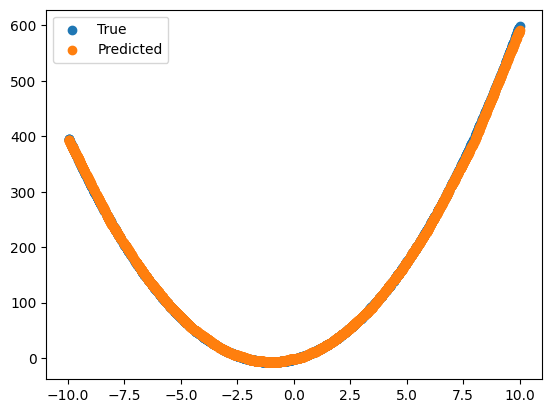

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9775 - mae: 1.1348
Test MSE: 2.8212969303131104
Test MAE: 1.1085054874420166


In [10]:
'''
Problem Statement:
      > Build a Fully Connected Feedforward Neural Network (FCFNN) for
        solving the equation f(x) = 5x^2 +10x -2
      > Training the FCFNN
      > Plotting original f(x) and predicted f(x)

'''

#======================= Necessary Imports =========================
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


#======================= Model Execution Flow =========================
def main():
  #--- Build model
  model = build_model()

  #--- Compile model with Adam optimizer and MSE loss
  model.compile(optimizer='adam', loss = 'mse' , metrics=['mae'])

  #--- Prepare data
  (trainX, trainY), (valX, valY), (testX, testY) = prepare_train_val_test()

  #--- Train model
  history = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = 30)

  #--- Predict on test data
  y_pred = model.predict(testX)

  #--- Plot true vs predicted values
  plt.scatter(testX, testY, label="True")
  plt.scatter(testX, y_pred, label="Predicted")
  plt.legend()
  plt.show()

  #--- Evaluate model performance on test set
  mse, mae = model.evaluate(testX, testY)
  print("Test MSE:", mse)
  print("Test MAE:", mae)


#======================= Model Construction =========================
def build_model():

  inputs = Input((1,))
  h0 = Dense(8, activation='relu')(inputs)
  h1 = Dense(16, activation='relu')(h0)
  h2 = Dense(64, activation='relu')(h1)
  h3 = Dense(16, activation='relu')(h2)
  outputs = Dense(1)(h3)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)

  return model

#======================= Polynomial Function  =========================
def my_polynomial(x):
  y = 5 * x**2 + 10 * x - 2
  return y

#======================= Data Processing =========================
def data_process(n = 100000):

  x = np.random.uniform(low = -10, high=10, size=10000)
  y = my_polynomial(x)

  return x, y

#======================= Data Splitting =========================
def prepare_train_val_test():

  x, y = data_process()
  total_n = len(x)
  print(x.shape, total_n)
  indices = np.random.permutation(total_n)
  x, y = x[indices], y[indices]

  # Split into train (70%), validation (10%), and test (20%)
  train_n = int(total_n * 0.7)
  val_n = int(total_n * 0.1)
  test_n = int(total_n * 0.2)

  trainX = x[: train_n]
  trainY = y[: train_n]
  valX = x[train_n : train_n + val_n]
  valY = y[train_n : train_n + val_n]
  testX = x[train_n + val_n :]
  testY = y[train_n + val_n :]


  print('total_n: {}, train_n: {}, val_n: {}, test_n: {}'.format(len(x), len(trainX), len(valX), len(testX)))

  return (trainX, trainY), (valX, valY), (testX, testY)



#======================= Entry Point =========================
if __name__ == '__main__':
  main()
